# Plotting feature importances

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_breast_cancer, load_boston

from rfpimp import *

## Rent data set, classify interest in ad

In [2]:
df_all = pd.read_csv("data/rent-cls.csv") 

num_features = ['bathrooms','bedrooms','latitude','longitude','price']
target = 'interest_level'

df = df_all[num_features + [target]]
df_train, df_test = train_test_split(df, test_size=0.15)

X_train, y_train = df_train.drop('interest_level',axis=1), df_train['interest_level']
X_test, y_test = df_test.drop('interest_level',axis=1), df_test['interest_level']

rf = RandomForestClassifier(n_estimators=100, n_jobs=-1,
#                            max_features=X_train.shape[1]-1,
                            max_features=1.0,
                            min_samples_leaf=10, oob_score=True)
rf.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features=1.0, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=10, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=-1,
            oob_score=True, random_state=None, verbose=0, warm_start=False)

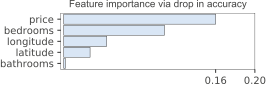

In [3]:
I = importances(rf, X_test, y_test)
plot_importances(I)

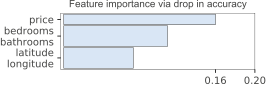

In [4]:
I = importances(rf, X_test, y_test, features=['price',['latitude','longitude']])
plot_importances(I)

## Breast cancer data set, classify malignant/benign

In [5]:
cancer = load_breast_cancer()

X, y = cancer.data, cancer.target
# show first 5 columns only
# df = pd.DataFrame(X[:, 0:10], columns=cancer.feature_names[0:10])
df = pd.DataFrame(X, columns=cancer.feature_names)
#df['diagnosis'] = cancer.target
X_train, X_test, y_train, y_test = train_test_split(df, y, test_size=0.15)

cl = RandomForestClassifier(n_estimators=100)
cl.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

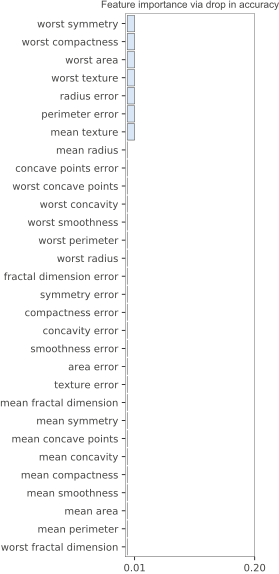

In [6]:
I = importances(cl, X_test, y_test)
plot_importances(I)

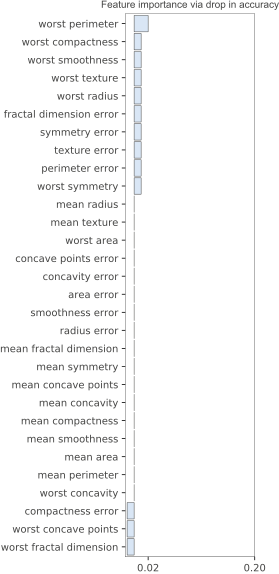

In [7]:
I = dropcol_importances(cl, X_train, y_train, X_test, y_test)
plot_importances(I)

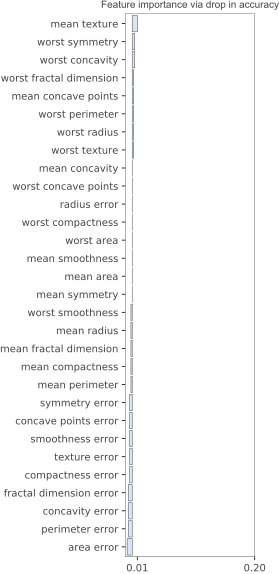

In [8]:
I = oob_dropcol_importances(cl, X_train, y_train)
plot_importances(I)

This obviously means that the features are highly collinear. Verified via:

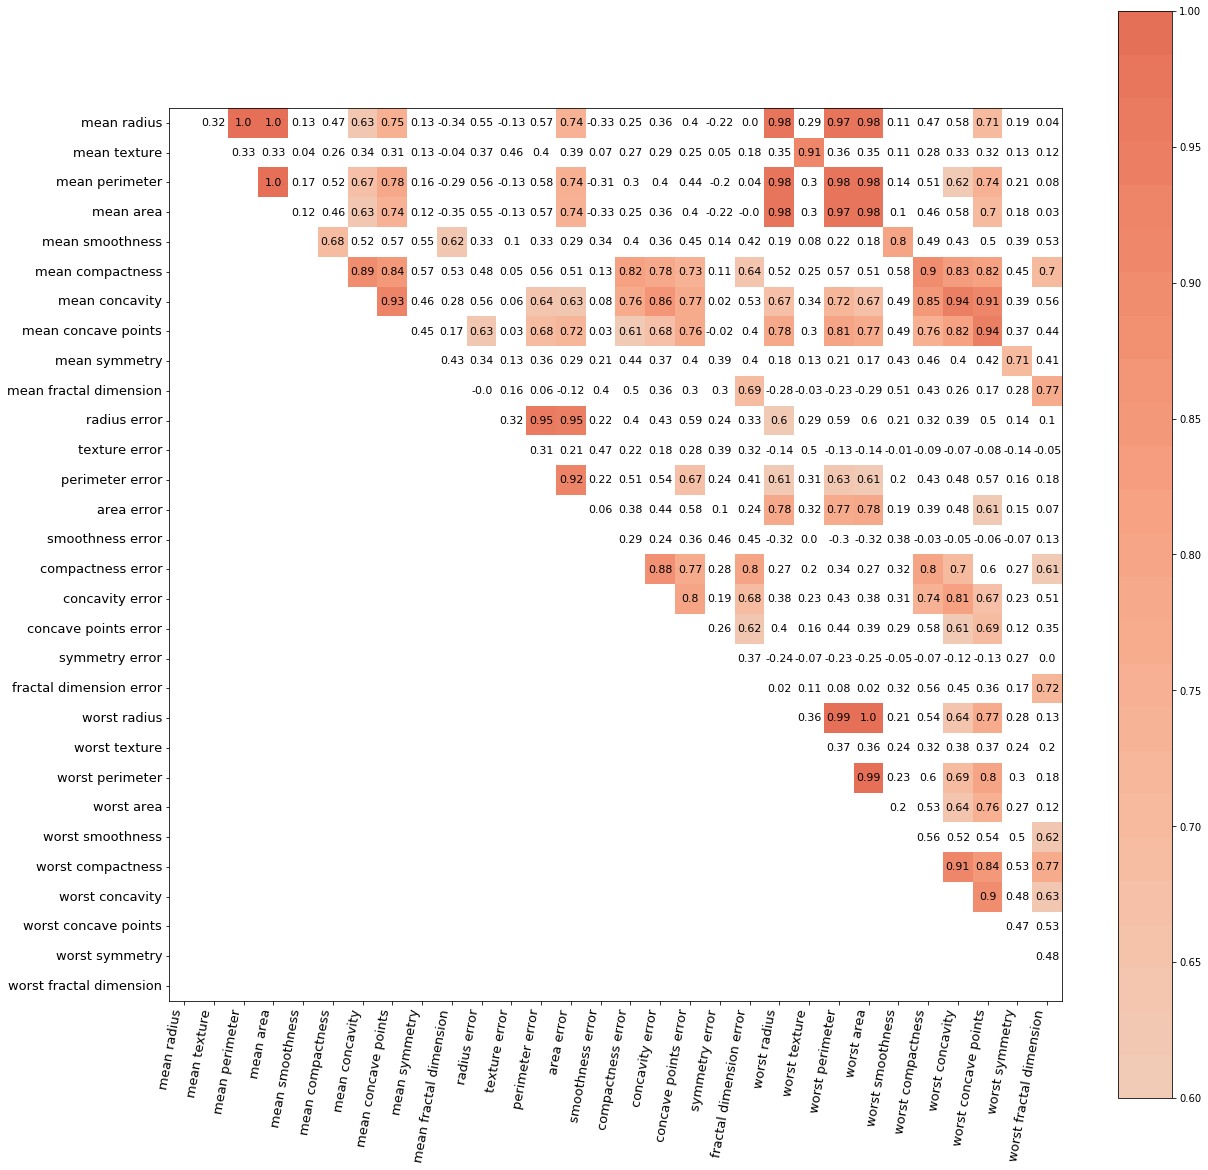

In [9]:
plot_corr_heatmap(X_train, figsize=(20,20), label_fontsize=13, value_fontsize=11)

Wow. And look at the predictability (R^2 or accuracy depending on column type) of the variables using other variables:

In [10]:
feature_dependence_matrix(X_train, n_samples=5000)

,Dependence,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
mean radius,0.995999,1,-0.000184415,0.0434688,1.57318,9.34088e-05,-2.11421e-05,1.38351e-05,0.000286002,-6.23542e-06,...,0.000312754,-3.56387e-05,-9.00603e-05,0.000317312,0.000107338,0.000318709,0.000195965,-5.00176e-05,2.99007e-05,-4.1649e-05
mean texture,0.8472,-0.000332561,1,-0.000374186,0.00144278,-8.56744e-05,8.37898e-06,0.000127169,0.000700688,-0.000714764,...,-0.000180074,1.6397,-0.000593377,0.000167931,0.0115569,0.00143956,-0.000195086,0.00211244,0.00936368,0.00127196
mean perimeter,0.993099,0.954271,8.44708e-06,1,0.15739,2.13386e-05,0.000271897,0.000622131,0.000471863,5.19788e-05,...,0.000381588,-7.13305e-05,0.000370193,4.80883e-05,-9.61775e-05,0.000276796,2.43232e-05,-7.53176e-06,3.23251e-06,5.18478e-05
mean area,0.988313,1.65063,-0.000609168,0.0191126,1,7.54231e-05,2.90753e-05,1.00195e-05,1.81361e-06,0.000161798,...,0.00253108,-0.000489746,0.00110953,0.000382715,-0.00013293,-4.84532e-05,-0.000250624,0.000199855,6.33235e-06,8.15813e-06
mean smoothness,0.779986,0.000543011,0.00392969,7.06187e-05,0.00220089,1,0.0545661,0.00253964,0.0172591,0.0202954,...,0.00174783,0.00840248,0.00174581,0.00252397,0.875872,0.00801828,0.0054958,0.00080471,0.001486,0.00686239
mean compactness,0.919441,0.000448996,0.0016932,0.000528038,-1.47153e-05,0.0385742,1,0.290296,0.00737126,0.00819513,...,0.000241627,-0.000469735,2.58702e-05,4.51548e-05,0.00217301,0.267527,-0.000478606,0.0192739,-4.49926e-05,0.00128646
mean concavity,0.944924,-8.3599e-05,0.00145425,-0.000102915,0.0002252,0.00198663,0.0170669,1,0.464808,0.000290692,...,0.000599208,-0.000145942,0.000309673,0.000130436,-0.000106319,0.000926561,0.230228,0.00936103,0.000528831,-0.000390251
mean concave points,0.942629,0.0015947,-0.000394219,0.0394208,0.000810136,0.00544988,0.00499016,0.339729,1,0.000973357,...,0.00342491,0.00063944,0.00603324,0.0023594,-0.000163369,0.00148867,0.00247281,0.348445,0.000900632,0.000307216
mean symmetry,0.683303,-0.00310893,0.00389273,0.000142901,0.000423571,0.0463753,0.0405254,0.000920543,-0.0039713,1,...,-0.00172711,0.00936029,0.000762225,0.00105498,0.0063753,0.00257621,0.00168469,0.00361994,0.705195,0.00769211
mean fractal dimension,0.832069,0.00873782,-0.00052706,0.00140114,0.0247203,0.0926677,0.0183426,0.000810372,-0.000145847,0.0155911,...,0.0084524,0.00354627,0.00550608,0.0363965,-0.000590858,0.00113458,0.000179222,-0.000831045,0.00364472,0.719638
